# Calculating Flood Risk

If at some point you ever want to buy a house near water, a variation of this question will undoubtedly pass through your head:

*What are the chances my {insert name of your expensive piece of property close to water} floods?*

In this post we will calculate the chance of an event happening, ie. the chance your beautiful riverside property floods over the life of your 30-year mortgage.
We will do this using our understanding of probability and statistics.

## Laying the groundwork
In my experience the question of probability of flood exceedance is a great example of where calculating the probability of something **not** happening is more intuitive and easier to understand.
It also shows how flood terminology obscures/confuses the probabilistic nature of estimating a chance of flooding.

## Flood Events, Return Periods, and Probability
I have found that there is a fundamental misunderstanding of the vocabulary used to communicate the probability of a flood event.
You may have heard something like this before:

*"Bob, the heavy rains north of Waterville were responsible for the 100-year flood event downtown."*

or

*"The city updated their flood maps to include our house in the 100-year floodplain"*

Do you know what is *really* meant by the term "100-year Flood"?
It is **NOT** the case that this event will only happen once every 100 years.

**Definition**: a "X-year Flood" conveys that *in any given year* there is a $\frac{1}{X}$ chance that a flood event of that magnitude will occur. 
The name 100-year Flood conveys that there is a $\frac{1}{100}$, or 0.01, chance of that magnitude event occurring; for a 50-year flood, 0.02; 2-year flood, 0.5.

Of course, all of these probabilities describe the chance an event happens *in a single year*.
Next, let us calculate the probability of an event occurring over multiple years.

## Formulating Exceedance Probability
We must first assume that the probabilities of flooding each year are independent and stationary.
Independence means that the probability of occurrence of a certain size flood in one year does not change the probability of a flood in any other years.
Stationary means that the probability does not change over time; i.e. in 30 years the probability and size of a 100-year flood will be the same as today.

Next, we must reconsider the question.
We want to know what the probability is of a certain sized flood happening *at least once* over $n$ consecutive years.
The complement of this question would be:

*What is the probability that a flood of size X **does not** occur during the next $n$ consecutive year?*

In any given year it is 100% likely that it will or will not flood to a certain extent.
Therefore, the probability that a flood of size X **does not** flood is the *complement* of the probability that it will, or 

$$P(X > x) = 1 - P(X < x)$$

Because the No-Flood condition,  $P(X < x)$, for each year is independent of each other, their joint probability is their product.
Thus, the probability that a flood of size X does not occur during $n$ consecutive years is

$$P(X > x)_{n} = (1 - P(X < x))_{1} \times (1 - P(X < x))_{2} \times \cdots (1 - P(X < x))_{n} $$

or,

$$P(X > x)_{n} = \left(1 - P(X < x)\right)^{n}$$

We now have a formula to calculate the probability that a flood of size X will not occur over $n$ consecutive years.
Now we can take its complement to determine the probability that a flood of size X will occur *at least once* over $n$ consecutive years.

$$P(X < x)_{n} = 1 - \left(1 - P(X < x)\right)^{n}$$

## Calculating Exceedance Probabilities
Equation in hand, we can plug in any values we want.
The table below shows the probability that a flood of various sizes will occur at least once over a 30 year period.

The graph below shows how these probabilities grow over the course of 30 years.

**Footnote**: 
You may be asking, how does one estimate the flood extent for an event with 1% chance of happening every year?
Great question.
You take historical streamflow data and fit it to a known statistical distribution.
You can then estimate the flood extent from the derived distribution.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [7]:
yearFlood = [1, 2, 5, 10, 25, 50, 100, 1000]
returnPeriod = [1/year for year in yearFlood]
notReturnPeriod = [1 - rt for rt in returnPeriod]

In [14]:
years = dict()
for i in range(1,31):
    years[i] = [1-nrt**i for nrt in notReturnPeriod]
df = pd.DataFrame.from_dict(years,orient='index',columns=yearFlood)

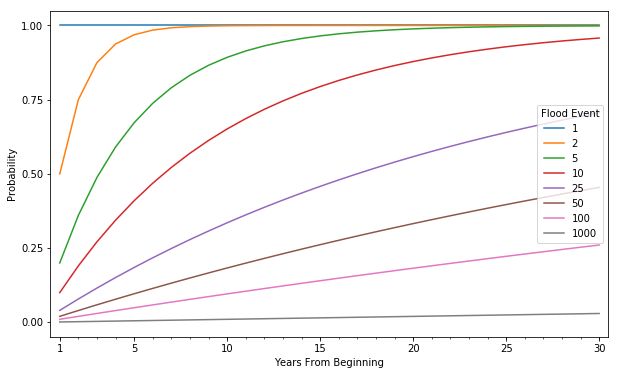

In [61]:
ax = df.plot(figsize=(10,6))

plt.xlim([0.5,30.5])
plt.xticks([1,5,10,15,20,25,30])
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.yticks([0.0,0.25,0.5,0.75,1])

plt.xlabel('Years From Beginning')
plt.ylabel('Probability')
plt.legend(title="Flood Event",loc='right')
plt.savefig('FloodExcedanceCurves.svg')
plt.show()

In [64]:
df.loc[30]

1       1.000000
2       1.000000
5       0.998762
10      0.957609
25      0.706142
50      0.454516
100     0.260300
1000    0.029569
Name: 30, dtype: float64